In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import glob
import seaborn as sns
import re
import os
import io
from scipy.stats import boxcox

In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install kaggle

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [ ]:
!kaggle datasets download -d "sobhanmoosavi/us-accidents"

Dataset URL: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents
License(s): CC-BY-NC-SA-4.0
us-accidents.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile

# Define the path to your zip file
file_path = '/content/us-accidents.zip'  # Replace 'your_file.zip' with your file's name

# Unzip the file to a specific destination
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/kaggle')  # Replace 'destination_folder' with your desired folder

In [ ]:
data1 = pd.read_csv('/content/drive/MyDrive/kaggle/US_Accidents_March23.csv')


In [ ]:
data = data1.copy()

In [ ]:
data.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [ ]:
print('The DataFrame has {} rows and {} columns'.format(data.shape[0],data.shape[1]))
print('\n')
missing = data.isnull().sum().sort_values(ascending=False)
percent_missing = ((missing/data.isnull().count())*100).sort_values(ascending=False)
missing_df = pd.concat([missing,percent_missing], axis=1, keys=['Total', 'Percent'],sort=False)
missing_df[missing_df['Total']>=1]

The DataFrame has 7728394 rows and 46 columns




,Total,Percent
End_Lng,3402762,44.029355
End_Lat,3402762,44.029355
Precipitation(in),2203586,28.512858
Wind_Chill(F),1999019,25.865904
Wind_Speed(mph),571233,7.391355
Visibility(mi),177098,2.291524
Wind_Direction,175206,2.267043
Humidity(%),174144,2.253301
Weather_Condition,173459,2.244438
Temperature(F),163853,2.120143


These data came from two sources, MapQuest and Bing, both of which report severity level but in a different way. Bing has 4 levels while MapQuest has 5. And according to dataset creator, there is no way to do a 1:1 mapping between them. We removed Bing as it has only Severity index of 4

In [ ]:
df = data.loc[data['Source']=="MapQuest",]
df = data.drop(['Source'], axis=1)
print("The shape of data is:",(df.shape))

The shape of data is: (7728394, 45)


######Removing Useless Features

*Features **'ID'** doesn't provide any useful information about accidents themselves.

In [ ]:
df = df.drop(['ID'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 44 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Severity               int64  
 1   Start_Time             object 
 2   End_Time               object 
 3   Start_Lat              float64
 4   Start_Lng              float64
 5   End_Lat                float64
 6   End_Lng                float64
 7   Distance(mi)           float64
 8   Description            object 
 9   Street                 object 
 10  City                   object 
 11  County                 object 
 12  State                  object 
 13  Zipcode                object 
 14  Country                object 
 15  Timezone               object 
 16  Airport_Code           object 
 17  Weather_Timestamp      object 
 18  Temperature(F)         float64
 19  Wind_Chill(F)          float64
 20  Humidity(%)            float64
 21  Pressure(in)           float64
 22  Visibility(mi)    

Categorical Features

In [ ]:
cat_names = ['Country', 'Timezone', 'Amenity', 'Bump', 'Crossing',
             'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
             'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
             'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
print("Unique count of categorical features:")
for i in cat_names:
  print(i,df[i].unique().size)

Unique count of categorical features:
Country 1
Timezone 5
Amenity 2
Bump 2
Crossing 2
Give_Way 2
Junction 2
No_Exit 2
Railway 2
Roundabout 2
Station 2
Stop 2
Traffic_Calming 2
Traffic_Signal 2
Turning_Loop 1
Sunrise_Sunset 3
Civil_Twilight 3
Nautical_Twilight 3
Astronomical_Twilight 3


In [ ]:
df = df.drop(['Country','Turning_Loop'], axis=1)

Cleaning and Simplyfying Wind Direction

In [ ]:
print("Wind Direction: ", df['Wind_Direction'].unique())

Wind Direction:  ['Calm' 'SW' 'SSW' 'WSW' 'WNW' 'NW' 'West' 'NNW' 'NNE' 'South' 'North'
 'Variable' 'SE' 'SSE' 'ESE' 'East' 'NE' 'ENE' 'E' 'W' nan 'S' 'VAR'
 'CALM' 'N']


In [ ]:
df.loc[df['Wind_Direction']=='Calm','Wind_Direction'] = 'CALM'
df.loc[(df['Wind_Direction']=='West')|(df['Wind_Direction']=='WSW')|(df['Wind_Direction']=='WNW'),'Wind_Direction'] = 'W'
df.loc[(df['Wind_Direction']=='South')|(df['Wind_Direction']=='SSW')|(df['Wind_Direction']=='SSE'),'Wind_Direction'] = 'S'
df.loc[(df['Wind_Direction']=='North')|(df['Wind_Direction']=='NNW')|(df['Wind_Direction']=='NNE'),'Wind_Direction'] = 'N'
df.loc[(df['Wind_Direction']=='East')|(df['Wind_Direction']=='ESE')|(df['Wind_Direction']=='ENE'),'Wind_Direction'] = 'E'
df.loc[df['Wind_Direction']=='Variable','Wind_Direction'] = 'VAR'
print("Wind Direction after simplification: ", df['Wind_Direction'].unique())

Wind Direction after simplification:  ['CALM' 'SW' 'S' 'W' 'NW' 'N' 'VAR' 'SE' 'E' 'NE' nan]


Cleaning and Simplyfying Weather Condition

In [ ]:
# show distinctive weather conditions
weather ='!'.join(df['Weather_Condition'].dropna().unique().tolist())
weather = np.unique(np.array(re.split(
    "!|\s/\s|\sand\s|\swith\s|Partly\s|Mostly\s|Blowing\s|Freezing\s", weather))).tolist()
print("Weather Conditions: ", weather)

Weather Conditions:  ['', 'Clear', 'Cloudy', 'Drifting Snow', 'Drizzle', 'Dust', 'Dust Whirls', 'Dust Whirls Nearby', 'Dust Whirlwinds', 'Duststorm', 'Fair', 'Fog', 'Funnel Cloud', 'Hail', 'Haze', 'Heavy ', 'Heavy Drizzle', 'Heavy Ice Pellets', 'Heavy Rain', 'Heavy Rain Shower', 'Heavy Rain Showers', 'Heavy Sleet', 'Heavy Smoke', 'Heavy Snow', 'Heavy T-Storm', 'Heavy Thunderstorms', 'Ice Pellets', 'Light ', 'Light Drizzle', 'Light Fog', 'Light Hail', 'Light Haze', 'Light Ice Pellets', 'Light Rain', 'Light Rain Shower', 'Light Rain Showers', 'Light Sleet', 'Light Snow', 'Light Snow Grains', 'Light Snow Shower', 'Light Snow Showers', 'Light Thunderstorm', 'Light Thunderstorms', 'Low Drifting Snow', 'Mist', 'N/A Precipitation', 'Overcast', 'Partial Fog', 'Patches of Fog', 'Rain', 'Rain Shower', 'Rain Showers', 'Sand', 'Scattered Clouds', 'Shallow Fog', 'Showers in the Vicinity', 'Sleet', 'Small Hail', 'Smoke', 'Snow', 'Snow Grains', 'Snow Nearby', 'Snow Showers', 'Squalls', 'T-Storm', 'Th

In [ ]:
df['Clear'] = np.where(df['Weather_Condition'].str.contains('Clear', case=False, na = False), True, False)
df['Cloud'] = np.where(df['Weather_Condition'].str.contains('Cloud|Overcast', case=False, na = False), True, False)
df['Rain'] = np.where(df['Weather_Condition'].str.contains('Rain|storm', case=False, na = False), True, False)
df['Heavy_Rain'] = np.where(df['Weather_Condition'].str.contains('Heavy Rain|Rain Shower|Heavy T-Storm|Heavy Thunderstorms', case=False, na = False), True, False)
df['Snow'] = np.where(df['Weather_Condition'].str.contains('Snow|Sleet|Ice', case=False, na = False), True, False)
df['Heavy_Snow'] = np.where(df['Weather_Condition'].str.contains('Heavy Snow|Heavy Sleet|Heavy Ice Pellets|Snow Showers|Squalls', case=False, na = False), True, False)
df['Fog'] = np.where(df['Weather_Condition'].str.contains('Fog', case=False, na = False), True, False)

In [ ]:
# Assign NA to created weather features where 'Weather_Condition' is null.
weather = ['Clear','Cloud','Rain','Heavy_Rain','Snow','Heavy_Snow','Fog']
for i in weather:
    df.loc[df['Weather_Condition'].isnull(),i] = df.loc[df['Weather_Condition'].isnull(),'Weather_Condition']
    df[i] = df[i].astype('bool')

df.loc[:,['Weather_Condition'] + weather]

df = df.drop(['Weather_Condition'], axis=1)

<ipython-input-106-b814be55abcf>:4: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[nan nan nan ... nan nan nan]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.

<ipython-input-106-b814be55abcf>:4: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[nan nan nan ... nan nan nan]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.

<ipython-input-106-b814be55abcf>:4: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[nan nan nan ... nan nan nan]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.

<ipython-input-106-b814be55abcf>:4: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version 

Data Time Format

'Weather_Timestamp' is almost as same as 'Start_Time', we can just keep 'Start_Time'. Then map 'Start_Time' to 'Year', 'Month', 'Weekday', 'Day' (in a year), 'Hour', and 'Minute' (in a day).

In [ ]:
import pandas as pd

# Assuming df is your DataFrame

# Convert 'Start_Time' column to datetime objects, handling extra decimal seconds
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')

# The format '%Y-%m-%d %H:%M:%S.%f' is used to accommodate the decimal seconds.
# errors='coerce' will set invalid parsing results to NaT (Not a Time) which can be handled later if needed.

# Now you can access datetime properties using .dt
df['Year'] = df['Start_Time'].dt.year
df['Month'] = df['Start_Time'].dt.month
df['Weekday'] = df['Start_Time'].dt.weekday
df['Day'] = df['Start_Time'].dt.day
df['Hour'] = df['Start_Time'].dt.hour
df['Minute'] = df['Start_Time'].dt.minute

MISSING DATA

In [ ]:
print('The DataFrame has {} rows and {} columns'.format(df.shape[0],df.shape[1]))
print('\n')
missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = ((missing/df.isnull().count())*100).sort_values(ascending=False)
missing_df = pd.concat([missing,percent_missing], axis=1, keys=['Total', 'Percent'],sort=False)
missing_df[missing_df['Total']>=1]

The DataFrame has 7728394 rows and 54 columns




,Total,Percent
Start_Time,6985228,90.383953
Day,6985228,90.383953
Year,6985228,90.383953
Month,6985228,90.383953
Minute,6985228,90.383953
Hour,6985228,90.383953
Weekday,6985228,90.383953
End_Lat,3402762,44.029355
End_Lng,3402762,44.029355
Precipitation(in),2203586,28.512858


It is possible to have 0 for Features like Humidity, Precipitation, Wind Speed, Visibility

In [ ]:
lst = ['Humidity(%)','Precipitation(in)','Wind_Chill(F)','Wind_Speed(mph)','Visibility(mi)']
for l in lst:
    df[l] = df[l].fillna(0)

In [ ]:
df['Precipitation_NA'] = 0
df.loc[df['Precipitation(in)'].isnull(),'Precipitation_NA'] = 1
df['Precipitation(in)'] = df['Precipitation(in)'].fillna(df['Precipitation(in)'].median())
df.loc[:5,['Precipitation(in)','Precipitation_NA']]

,Precipitation(in),Precipitation_NA
0,0.02,0
1,0.00,0
2,0.00,0
3,0.00,0
4,0.00,0
5,0.03,0


Drop Nan

The counts of missing values in some features are much smaller compared to the total sample. It is convenient to drop rows with missing values in these columns.

Drop NAs by these features:

'City'
'Zipcode'
'Airport_Code'
'Sunrise_Sunset'
'Civil_Twilight'
'Nautical_Twilight'
'Astronomical_Twilight'


In [ ]:
df = df.dropna(subset=['City','Zipcode','Airport_Code',
                       'Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'])

# Imputation

Rest of them have small missing values

In [ ]:
# group data by 'Airport_Code' and 'Start_Month' then fill NAs with median value
Weather_data=['Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)']
print("The number of remaining missing values: ")
for i in Weather_data:
  # Calculate the median for each group and fill NAs
  # The transform method ensures the result has the same index as the original DataFrame
  df[i] = df.groupby(['Airport_Code','Month'])[i].transform(lambda x: x.fillna(x.median()))
  print( i + " : " + df[i].isnull().sum().astype(str))

The number of remaining missing values: 


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/usr/local

Temperature(F) : 6954925
Humidity(%) : 6950394


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/usr/local

Pressure(in) : 6954888
Visibility(mi) : 6950394
Wind_Speed(mph) : 6950394


In [ ]:
df = df.dropna(subset=Weather_data)


# Categorical Weather Features


For categorical weather features, majority rather than median will be used to replace missing values.

In [ ]:
# group data by 'Airport_Code' and 'Start_Month' then fill NAs with majority value
from collections import Counter
weather_cat = ['Wind_Direction'] + weather
print("Count of missing values that will be dropped: ")
for i in weather_cat:
  # Use transform to ensure index alignment
  df[i] = df.groupby(['Airport_Code','Month'])[i].transform(lambda x: x.fillna(Counter(x).most_common()[0][0]) if all(x.isnull())==False else x.fillna(x.mode()[0] if not x.mode().empty else x.ffill())) # fill with mode if exist otherwise ffill

  print(i + " : " + df[i].isnull().sum().astype(str))

# drop na
df = df.dropna(subset=weather_cat)

Count of missing values that will be dropped: 


<ipython-input-114-a420f4753d93>:7: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Wind_Direction : 5898
Clear : 0
Cloud : 0
Rain : 0
Heavy_Rain : 0
Snow : 0
Heavy_Snow : 0
Fog : 0


# Part 2


In [ ]:
df.columns

df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])
# Calculate duration
df['Duration'] = df['End_Time'] - df['Start_Time']

# Convert duration to minutes
df['Duration'] = df['Duration'].dt.total_seconds() / 60

<ipython-input-115-3347022c7734>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-116-3af23b959b10>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




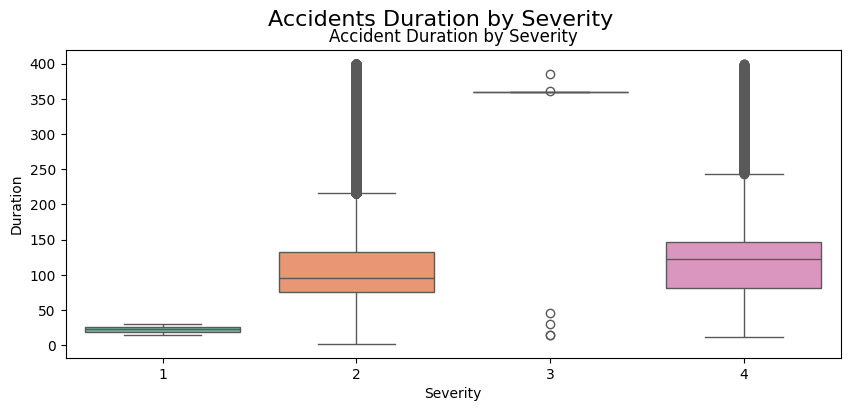

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it has 'Severity' and 'Duration' columns.
fig, axs = plt.subplots(ncols=1, figsize=(10, 4))  # Single subplot now
sns.boxplot(x="Severity", y="Duration", data=df.loc[df['Duration'] < 400,], palette="Set2", ax=axs)
axs.set_title('Accident Duration by Severity') # Simplified title
fig.suptitle('Accidents Duration by Severity', fontsize=16)
plt.show()

Severity 1 (Lowest): Consistently short durations with minimal variation Indicates mild accidents requiring little time to resolve. Severity 2: Wider spread of durations with higher median than Severity 1. Represents moderate accidents; outliers show occasional long durations. Severity 3:Median duration slightly higher than Severity 2. Noticeable outliers reflect rare but significantly prolonged accident events. Severity 4 (Highest): Longest durations among all severities, indicating serious incidents. Fewer outliers but consistent indication of higher time requirements for resolution.

This distribution highlights the increasing time investment as accident severity rises.

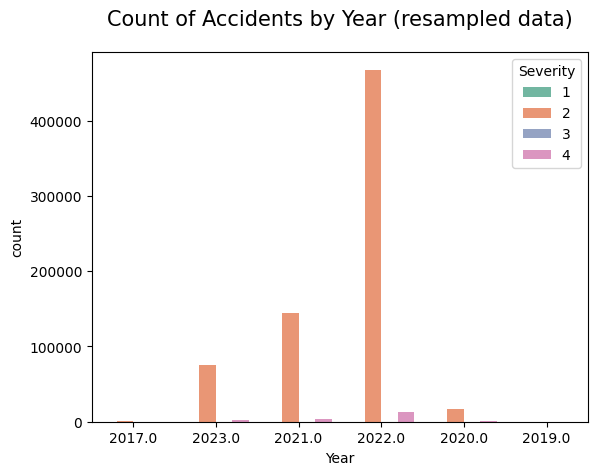

In [ ]:
df.Year = df.Year.astype(str)
sns.countplot(x='Year', hue='Severity', data=df ,palette="Set2")
plt.title('Count of Accidents by Year (resampled data)', size=15, y=1.05)
plt.show()

Dominance of Severity 2: Accidents with Severity 2 are overwhelmingly the most frequent across all years. A significant spike is observed in 2022, indicating either a sharp increase in moderate accidents or improved data reporting systems.

Low Counts for Severities 1, 3, and 4: Severity 1 incidents are almost negligible, reflecting fewer minor accidents recorded or reported. Severities 3 and 4 maintain low yet steady counts over the years, indicating consistency in the occurrence of severe accidents.

Notable Growth Over Time: The data shows an increasing trend in total accidents, with the most notable rise between 2021 and 2022.

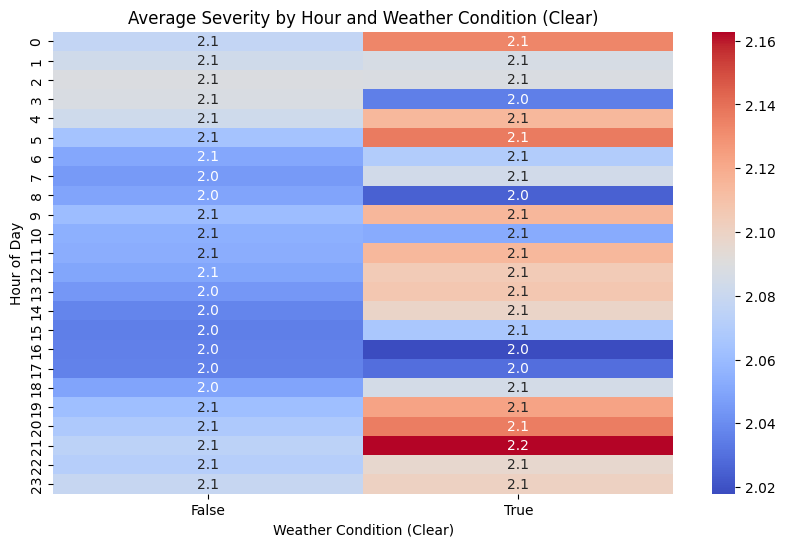

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping data for heatmap
df['Hour'] = pd.to_datetime(df['Start_Time']).dt.hour
heatmap_data = df.groupby(['Hour', 'Clear'])['Severity'].mean().unstack()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="coolwarm")
plt.title('Average Severity by Hour and Weather Condition (Clear)')
plt.xlabel('Weather Condition (Clear)')
plt.ylabel('Hour of Day')
plt.show()


Stable Severity: Severity averages between 2.0 and 2.2 across all hours, with slight peaks during early mornings and evenings.

Clear Weather Impact: Clear weather shows slightly higher severity, especially during evening rush hours (5–7 PM).

In [ ]:
import plotly.express as px

# Aggregating data
state_accidents = df.groupby('State').size().reset_index(name='Accident Count')

# Plot choropleth
fig = px.choropleth(state_accidents, locations='State', locationmode="USA-states",
                    color='Accident Count', scope="usa", color_continuous_scale="Viridis",
                    title="Accident Frequency by State")
fig.show()


High Accidents: California, Texas, and Florida report the highest accident counts due to high population and traffic density.

Low Accidents: Central and northern states have fewer incidents, likely due to lower urbanization.

Concentration: Accidents are concentrated in urban and coastal areas.

Purpose: Hotspot Identification: Targets high-risk states for safety measures.

Resource Allocation: Guides infrastructure improvements and policy interventions.

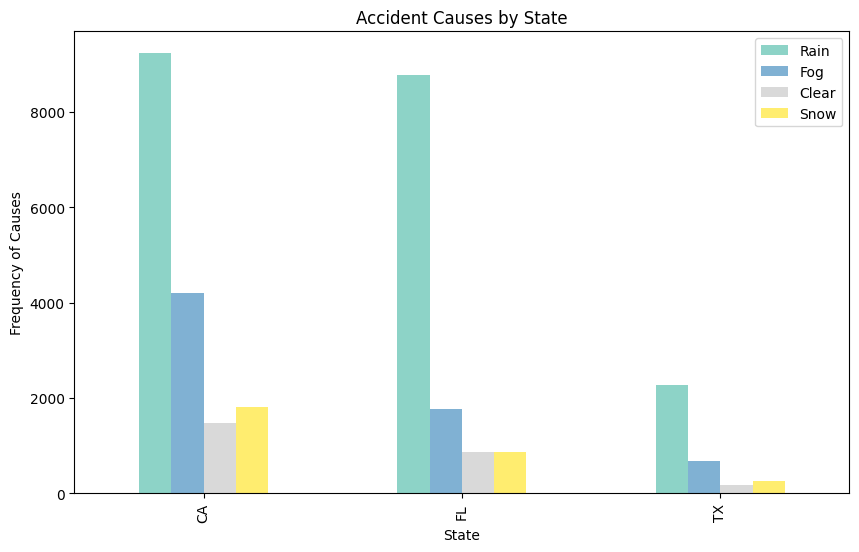

In [ ]:
# Sample data for states
sample_states = ['CA', 'TX', 'FL']
causes = ['Rain', 'Fog', 'Clear', 'Snow']

regional_data = df[df['State'].isin(sample_states)].groupby(['State'])[causes].sum()

# Plot clustered bar chart
regional_data.plot(kind='bar', figsize=(10, 6), colormap='Set3')
plt.title('Accident Causes by State')
plt.xlabel('State')
plt.ylabel('Frequency of Causes')
plt.show()


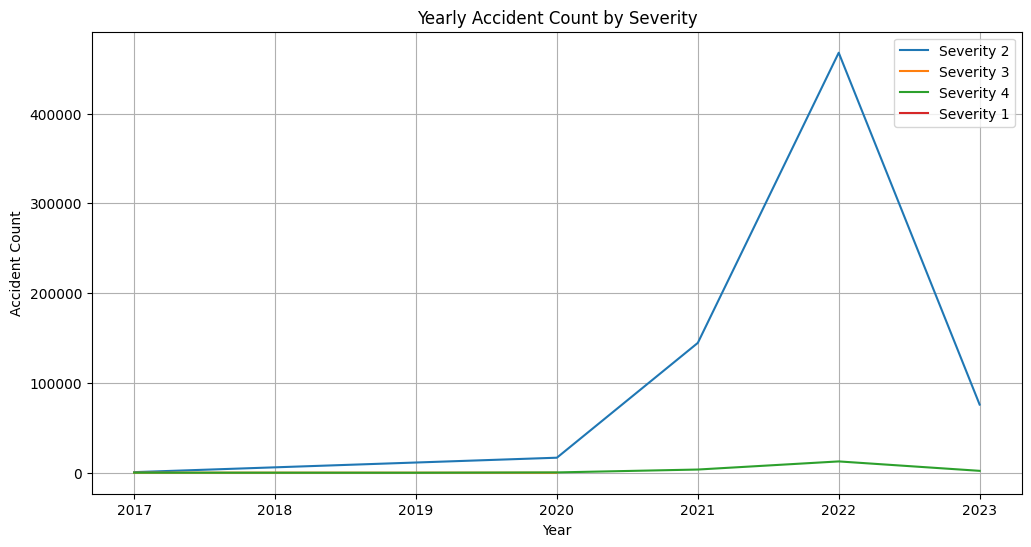

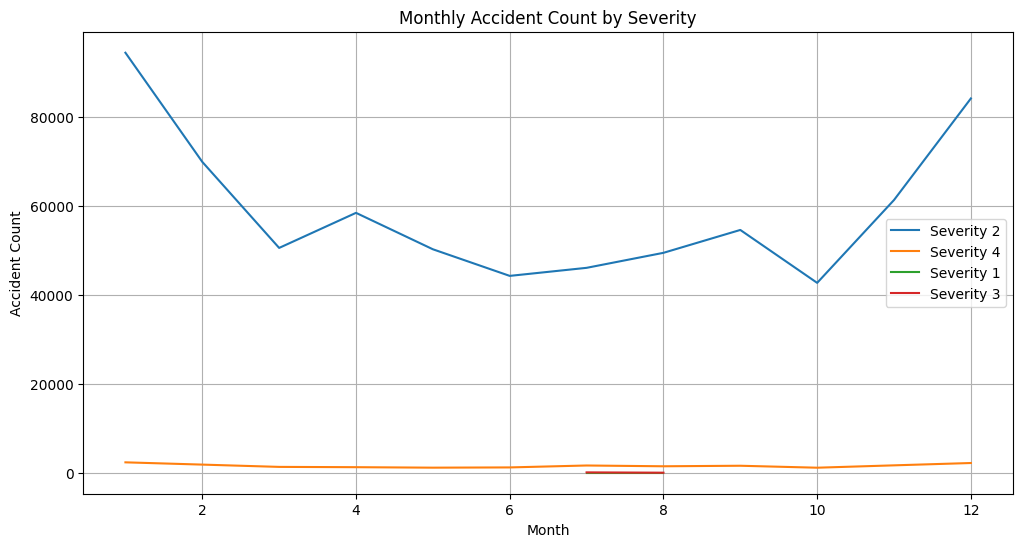

In [ ]:
#Line chart: Yearly/Monthly count of accidents by Severity to show trends.

import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Start_Time' to datetime if it's not already
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Extract year and month
df['Year'] = df['Start_Time'].dt.year
df['Month'] = df['Start_Time'].dt.month

# Group by year and severity, then count accidents
yearly_accidents = df.groupby(['Year', 'Severity']).size().reset_index(name='Accident Count')

# Create the line plot
plt.figure(figsize=(12, 6))
for severity in yearly_accidents['Severity'].unique():
    subset = yearly_accidents[yearly_accidents['Severity'] == severity]
    plt.plot(subset['Year'], subset['Accident Count'], label=f'Severity {severity}')

plt.xlabel('Year')
plt.ylabel('Accident Count')
plt.title('Yearly Accident Count by Severity')
plt.legend()
plt.grid(True)
plt.show()


# Group by month and severity, then count accidents
monthly_accidents = df.groupby(['Month', 'Severity']).size().reset_index(name='Accident Count')

# Create the line plot
plt.figure(figsize=(12, 6))
for severity in monthly_accidents['Severity'].unique():
    subset = monthly_accidents[monthly_accidents['Severity'] == severity]
    plt.plot(subset['Month'], subset['Accident Count'], label=f'Severity {severity}')

plt.xlabel('Month')
plt.ylabel('Accident Count')
plt.title('Monthly Accident Count by Severity')
plt.legend()
plt.grid(True)
plt.show()


Yearly Trends: Severity 2 dominates accident counts, with a significant peak in 2022. Other severities (3 and 4) show consistent but much lower counts.

Monthly Trends: Severity 2 accidents peak in January and December, likely due to winter conditions. Severity 4 remains minimal but steady throughout the year.

Purpose: Temporal Insights: Highlights annual and monthly trends in accident severity.

Seasonal Patterns: Identifies months or years with heightened risks for targeted safety interventions.

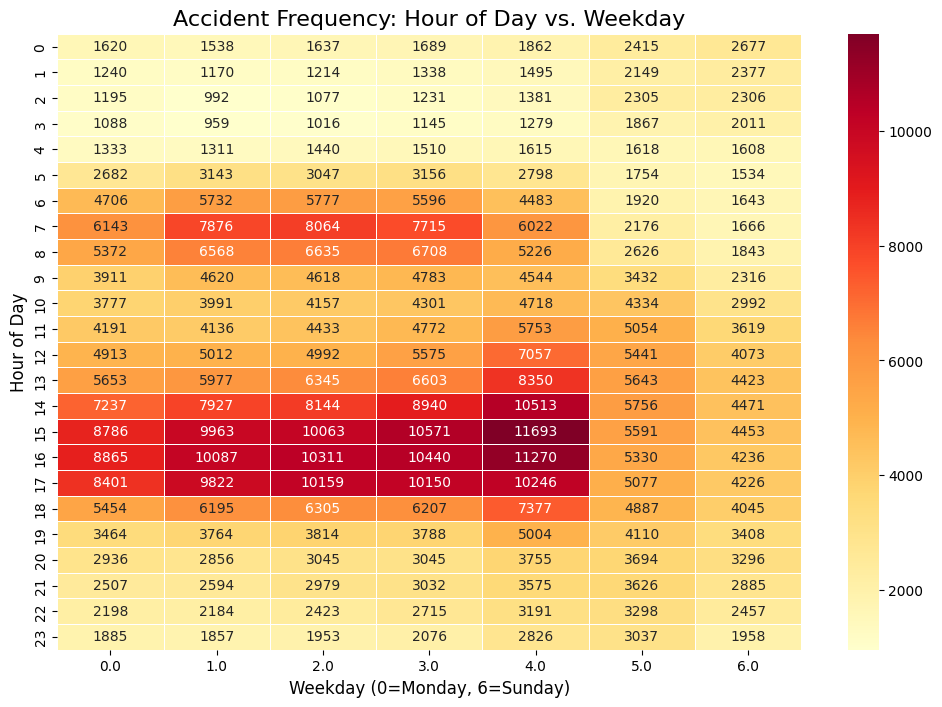

In [ ]:
# Heatmap: Hour of the day vs. Weekday to identify peak times for accidents.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create the heatmap
plt.figure(figsize=(12, 8))
heatmap_data = df.groupby(['Hour', 'Weekday'])['Severity'].count().unstack()
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlOrRd", linewidths=.5) # Use a perceptually uniform colormap
plt.title('Accident Frequency: Hour of Day vs. Weekday', fontsize=16)
plt.xlabel('Weekday (0=Monday, 6=Sunday)', fontsize=12)
plt.ylabel('Hour of Day', fontsize=12)
plt.show()

Peak Hours: Accidents peak during evening rush hours (4 PM to 7 PM) on weekdays due to high traffic density.

Lowest Hours: Early morning (midnight to 5 AM) has the fewest accidents, likely due to low traffic volumes.

Weekday Patterns: Weekdays (Monday-Friday) show consistently high accident frequencies, especially during commuting hours, while weekends have lower counts overall.

<ipython-input-123-879e12420dc7>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




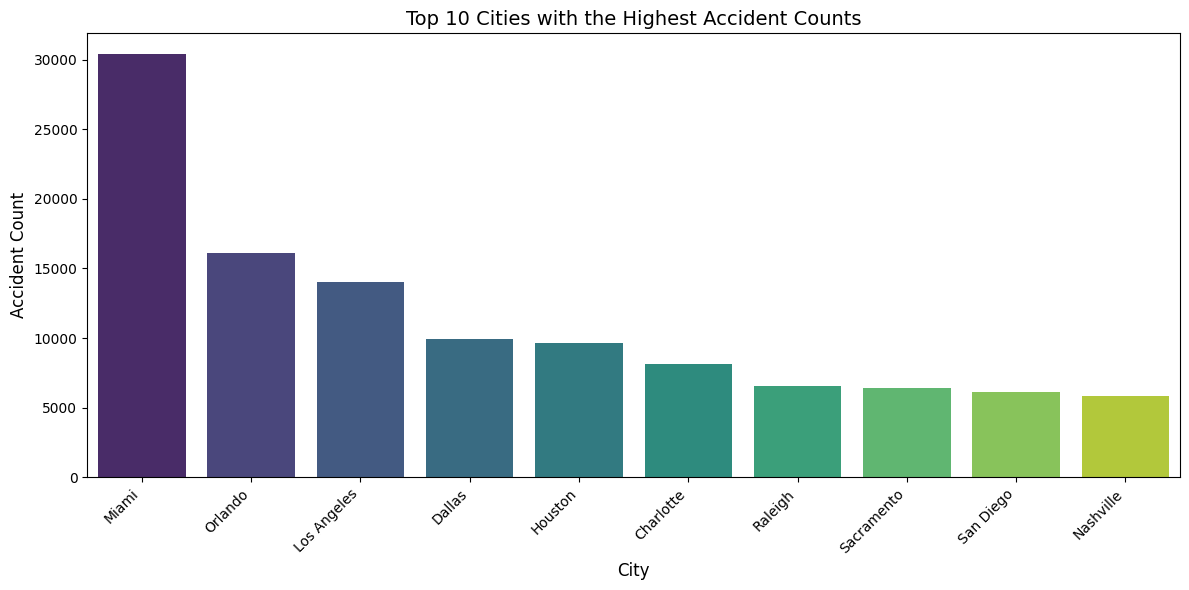

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Group by city and count accidents
city_accidents = df.groupby('City')['Severity'].count().reset_index(name='Accident Count')

# Sort by accident count in descending order and get the top 10
top_10_cities = city_accidents.sort_values(by='Accident Count', ascending=False).head(10)


# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x='City', y='Accident Count', data=top_10_cities, palette='viridis')
plt.title('Top 10 Cities with the Highest Accident Counts', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Accident Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Top City: Miami leads in accident counts, significantly higher than other cities.

Other Cities: Orlando, Los Angeles, Dallas, and Houston follow, reflecting high urbanization and traffic density.

Trend: Accidents are concentrated in large, populous cities with heavy traffic flow.

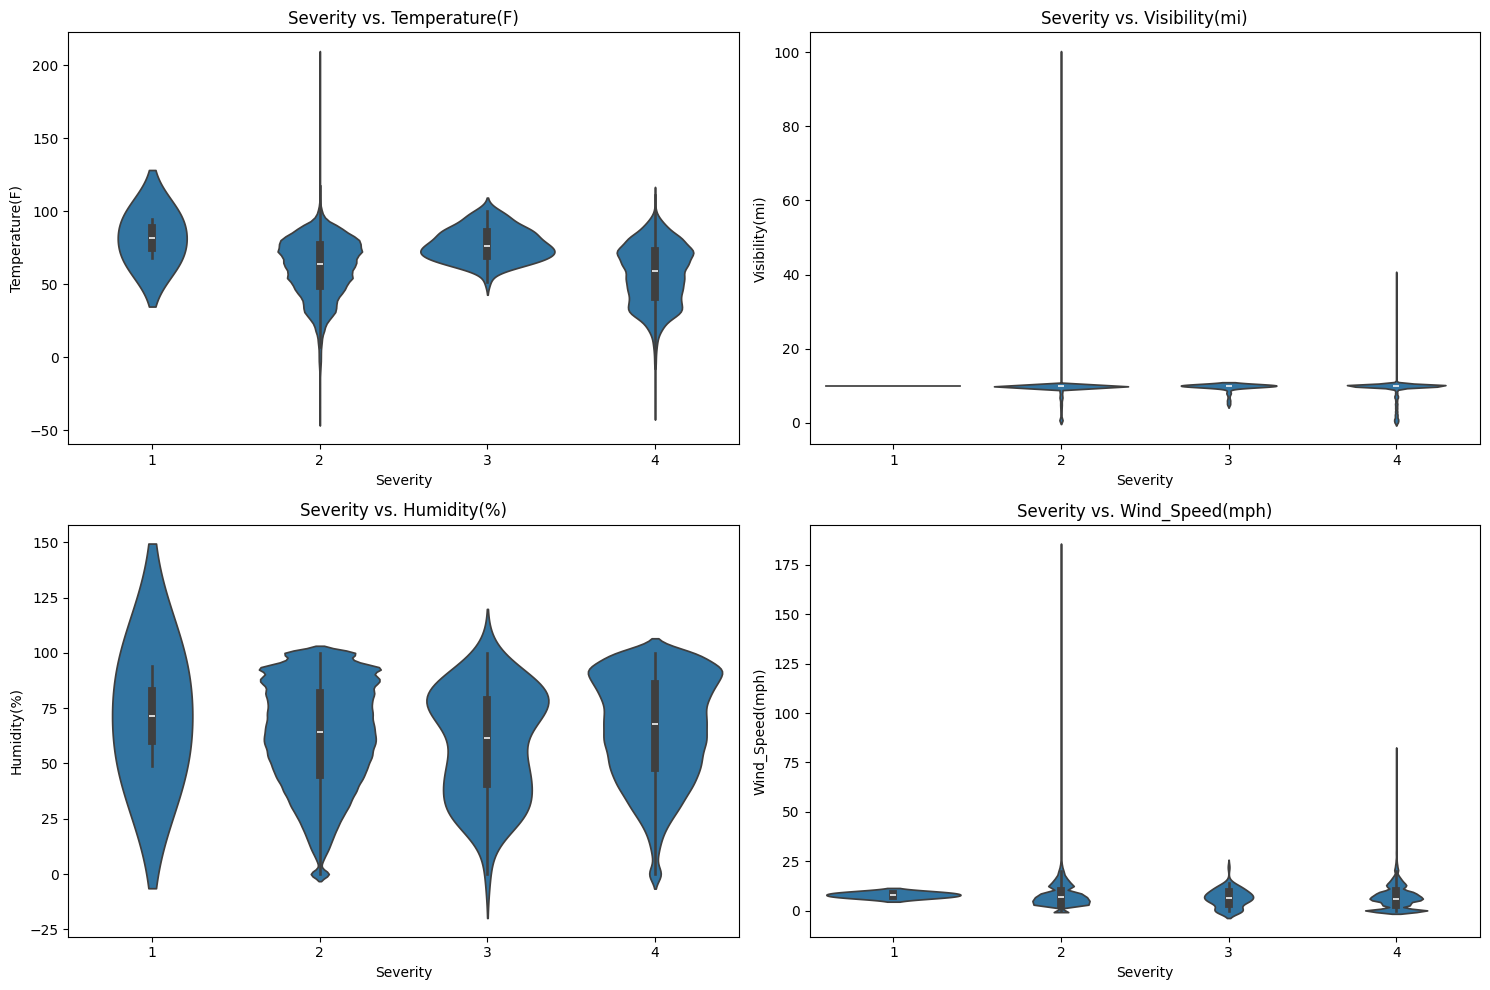

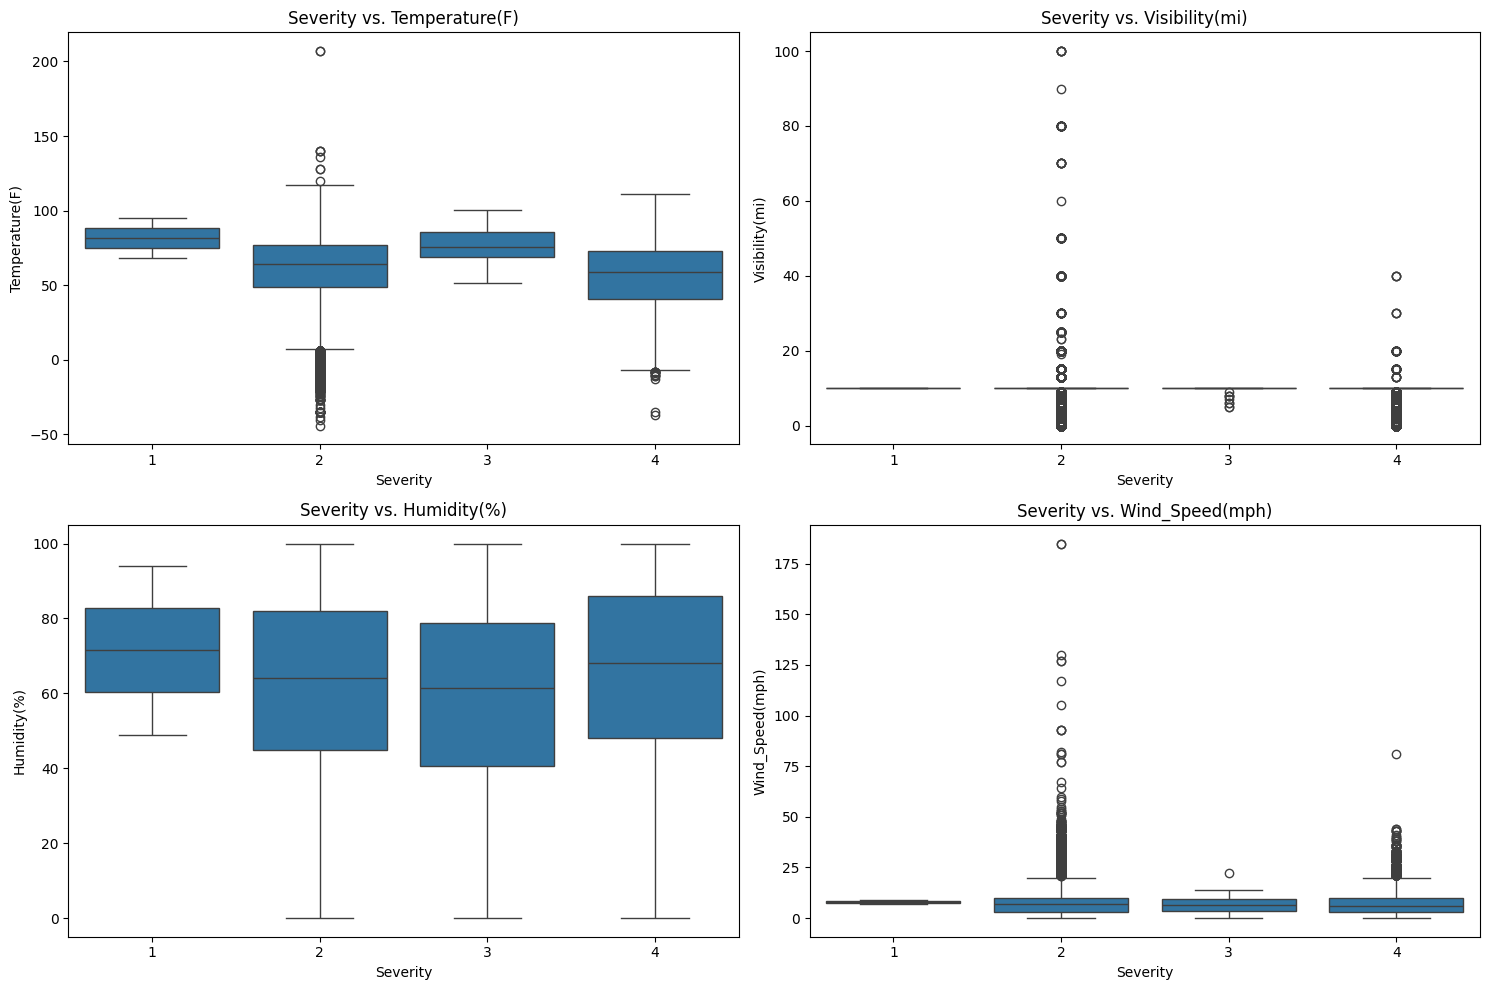

In [ ]:
# Violin/Boxplot: Severity vs. Temperature(F), Visibility(mi), Humidity(%), and Wind_Speed(mph)

import matplotlib.pyplot as plt
import seaborn as sns

# ['Severity', 'Temperature(F)', 'Visibility(mi)', 'Humidity(%)', 'Wind_Speed(mph)']

# List of features to plot against Severity
features = ['Temperature(F)', 'Visibility(mi)', 'Humidity(%)', 'Wind_Speed(mph)']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

# Iterate through features and create violin plots
for i, feature in enumerate(features):
    sns.violinplot(x='Severity', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Severity vs. {feature}')

plt.tight_layout()
plt.show()


# Create subplots for box plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

# Iterate through features and create box plots
for i, feature in enumerate(features):
    sns.boxplot(x='Severity', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Severity vs. {feature}')

plt.tight_layout()
plt.show()

Severity vs. Temperature: Accidents occur across a wide temperature range, with no clear relationship between severity and temperature.

Severity vs. Visibility: Lower visibility (near zero) is common for all severities, but high severity shows slightly more variation.

Severity vs. Humidity: Higher severity accidents are often associated with moderate to high humidity levels.

Severity vs. Wind Speed: Wind speed has minimal impact on accident severity, with most accidents occurring under low wind speeds.

Key Insight: Weather factors like visibility and humidity show some influence on accident severity, while temperature and wind speed have limited impact.

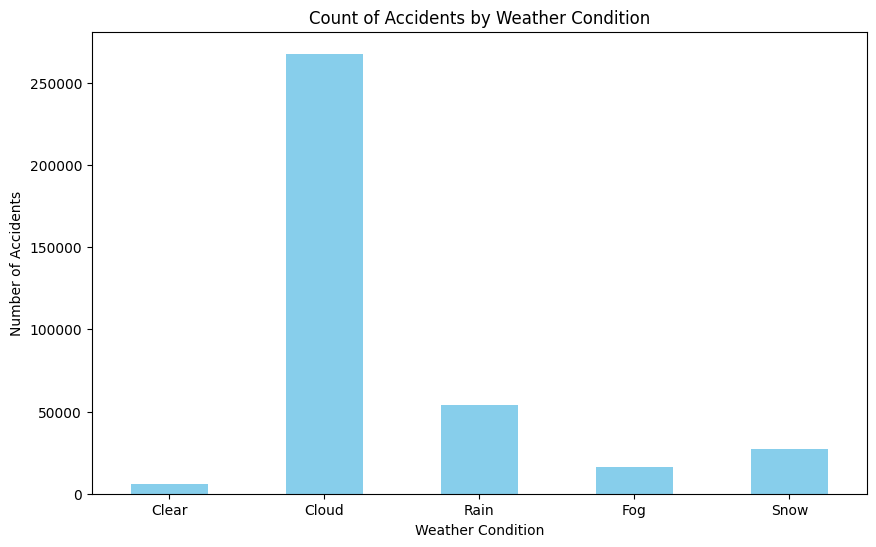

In [ ]:
# Bar chart: Count of accidents under clear, foggy, rainy, snowy, or cloudy conditions.

import matplotlib.pyplot as plt

# Count accidents for each weather condition
weather_counts = df[['Clear', 'Cloud', 'Rain', 'Fog', 'Snow']].sum()

# Create the bar chart
plt.figure(figsize=(10, 6))
weather_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.show()

Cloudy Weather: Most accidents occur under cloudy conditions, indicating its prevalence during driving.

Rain and Snow: Moderate accident counts are observed, suggesting higher risk during these weather conditions.

Clear Weather: Fewest accidents occur under clear conditions, showing relatively safer driving environments.

Insigts: Cloudy weather contributes most to accidents, possibly due to reduced visibility or frequent occurrence, while rain and snow significantly increase risks.

**Road and Infrastructure Impact**

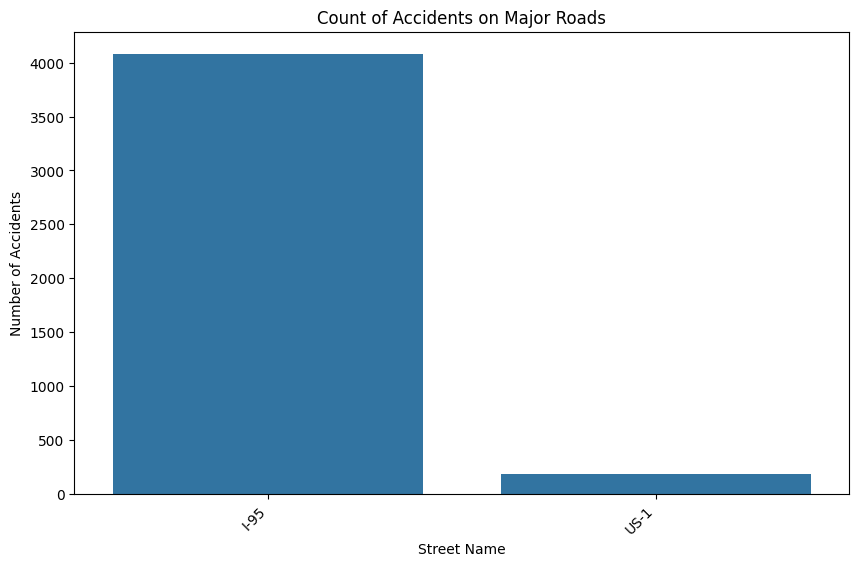

In [ ]:
# Bar chart: Count of accidents by Street, focusing on major roads.

import matplotlib.pyplot as plt
import seaborn as sns

# Define major roads (replace with your actual criteria)
major_roads = ['I-95', 'US-1', 'State Hwy 42']

# Filter the DataFrame for major roads
major_road_accidents = df[df['Street'].isin(major_roads)]

# Count accidents for each major road
street_counts = major_road_accidents['Street'].value_counts()

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=street_counts.index, y=street_counts.values)
plt.title('Count of Accidents on Major Roads')
plt.xlabel('Street Name')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Cluster analysis: Group accidents by road features and severity.

from sklearn.cluster import KMeans

# Select relevant features for clustering
features = ['Severity', 'Temperature(F)', 'Visibility(mi)', 'Humidity(%)', 'Wind_Speed(mph)', 'Precipitation(in)']
X = df[features]

# Standardize features (important for KMeans)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Analyze the clusters
print(df.groupby('Cluster')[features].mean())


# using PCA (Principal Component Analysis)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf['Cluster'] = df['Cluster']

         Severity  Temperature(F)  Visibility(mi)  Humidity(%)  \
Cluster                                                          
0        2.000011       47.191576        7.651560    82.052718   
1        2.000098       71.395358        9.892662    48.981879   
2        3.998287       56.716762        8.926879    65.732031   

         Wind_Speed(mph)  Precipitation(in)  
Cluster                                      
0               5.762131           0.013086  
1               8.714223           0.000272  
2               6.865785           0.004322  


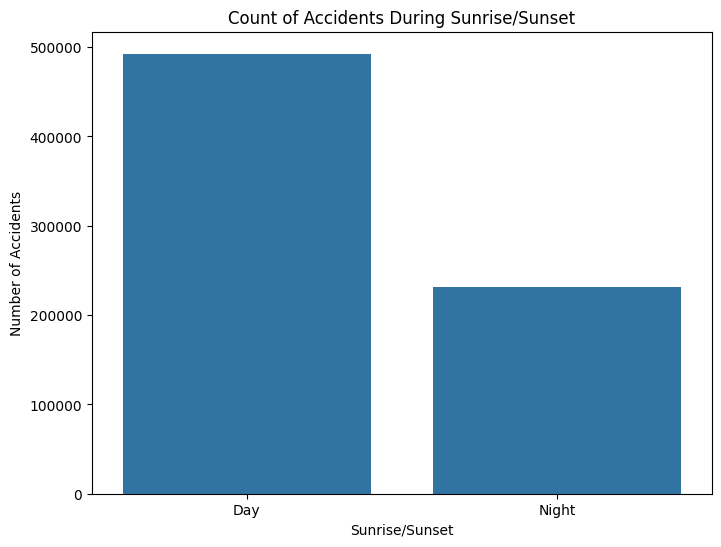

In [ ]:
# Bar chart: Count of accidents during Sunrise_Sunset categories.

import matplotlib.pyplot as plt
import seaborn as sns

# Count accidents for each sunrise/sunset category
sunrise_sunset_counts = df['Sunrise_Sunset'].value_counts()

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=sunrise_sunset_counts.index, y=sunrise_sunset_counts.values)
plt.title('Count of Accidents During Sunrise/Sunset')
plt.xlabel('Sunrise/Sunset')
plt.ylabel('Number of Accidents')
plt.show()

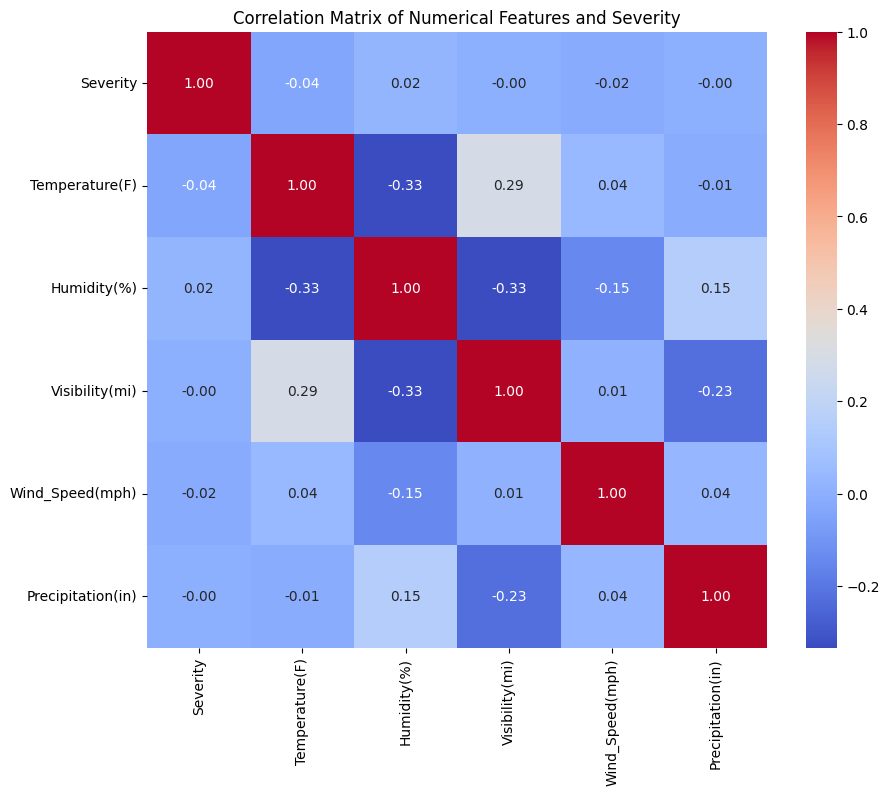

In [ ]:
# prompt: Correlation Analysis:
# Calculate the correlation coefficient (e.g., Pearson/Spearman) between numerical features (Temperature(F), Humidity(%), etc.) and Severity.
# Use a heatmap to visualize the correlations.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it contains numerical features like 'Temperature(F)', 'Humidity(%)', etc., and 'Severity'.

# Select numerical features for correlation analysis (excluding non-numerical columns)
numerical_features = ['Severity', 'Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']
numerical_df = df[numerical_features]

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr(method='pearson')  # You can use 'spearman' if needed


# Create a heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features and Severity')
plt.show()

In [ ]:
# Cluster analysis: Group accidents by road features and severity.

from sklearn.cluster import KMeans

# Select relevant features for clustering
features = ['Severity', 'Temperature(F)', 'Visibility(mi)', 'Humidity(%)', 'Wind_Speed(mph)', 'Precipitation(in)']
X = df[features]

# Standardize features (important for KMeans)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Analyze the clusters
print(df.groupby('Cluster')[features].mean())


# using PCA (Principal Component Analysis)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf['Cluster'] = df['Cluster']

         Severity  Temperature(F)  Visibility(mi)  Humidity(%)  \
Cluster                                                          
0        2.000011       47.191576        7.651560    82.052718   
1        2.000098       71.395358        9.892662    48.981879   
2        3.998287       56.716762        8.926879    65.732031   

         Wind_Speed(mph)  Precipitation(in)  
Cluster                                      
0               5.762131           0.013086  
1               8.714223           0.000272  
2               6.865785           0.004322  


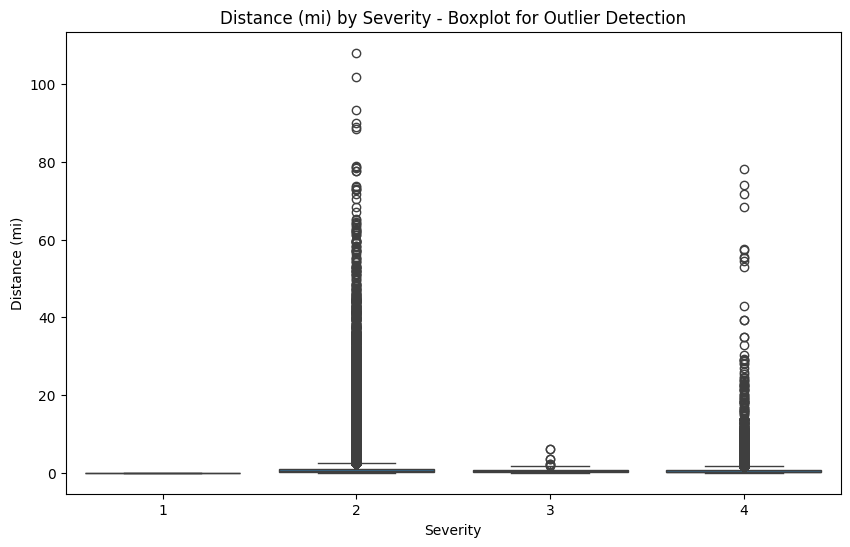

In [ ]:
# Boxplot: Distance(mi) by Severity to detect extreme cases.

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Severity', y='Distance(mi)', data=df)
plt.title('Distance (mi) by Severity - Boxplot for Outlier Detection')
plt.xlabel('Severity')
plt.ylabel('Distance (mi)')
plt.show()

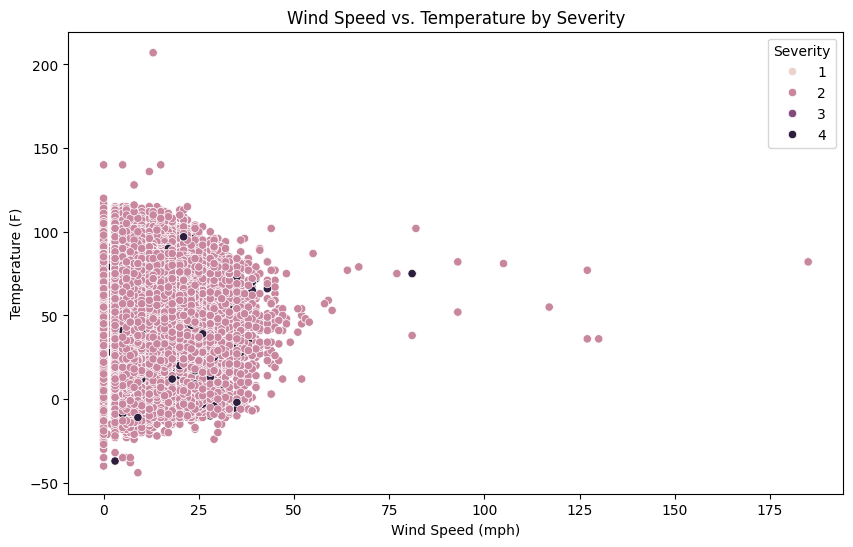

In [ ]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Wind_Speed(mph)', y='Temperature(F)', hue='Severity', data=df)
plt.title('Wind Speed vs. Temperature by Severity')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Temperature (F)')
plt.show()


Wind Speed vs. Temperature: Most data points are concentrated at low wind speeds (0–25 mph) and moderate temperatures (0–100°F), indicating typical conditions during accidents. Higher wind speeds (>50 mph) and extreme temperatures (<0°F or >100°F) have sparse data points, suggesting rare occurrences.

Severity Distribution: Severity levels are uniformly distributed across wind speeds and temperatures, showing no strong correlation between these factors and accident severity.

Insight: Accidents primarily occur under typical weather conditions, with extreme wind speeds and temperatures playing a minimal role. Weather data alone may not strongly predict severity.

**Overall Analysis:**
Temporal Trends: Accidents peak during rush hours (7–9 AM and 4–6 PM) and on weekdays, aligning with high traffic volumes during commuting times. Weekends and late-night hours see fewer accidents, reflecting reduced traffic activity.

**Weather Impact:** Most accidents occur under cloudy weather conditions, followed by rain and snow, indicating that adverse weather moderately increases accident risks. Clear weather has the fewest accidents, confirming safer driving conditions.

**Severity Distribution:** Severity levels are largely unaffected by most weather conditions like temperature, wind speed, and visibility, showing weak correlations. Typical weather conditions (moderate temperatures and low wind speeds) dominate accident scenarios.

**Geographic Patterns:** Urbanized states and cities with high traffic density (e.g., Miami, Orlando) experience the most accidents, emphasizing the role of population density and traffic flow.

**Feature Selection for Modeling:** The selected features, including weather variables, temporal data (hour and weekday), and specific weather types (clear, rain, snow), provide a balanced mix of predictive factors for accident severity modeling.

**Final Insight:** The visualizations show that accidents are influenced more by temporal patterns (rush hours and weekdays) and environmental factors like traffic density, rather than extreme weather conditions. These insights provide a strong foundation for predictive modeling and targeted interventions to reduce accident frequency and severity.

# Data Modelling

What predictions/classifications can we make on the data

#### Packages

In [ ]:


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#### Data Preprocessing

In [ ]:
features = ['Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Hour', 'Weekday', 'Clear', 'Cloud', 'Rain', 'Heavy_Rain', 'Snow', 'Heavy_Snow', 'Fog']
target = 'Severity'


# Encode categorical features for use in models
label_encoders = {}
for col in features:
  if df[col].dtype == 'object' or pd.api.types.is_categorical_dtype(df[col]):
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df['Clear'] = df['Clear'].astype(int)
df['Rain'] = df['Rain'].astype(int)
df['Snow'] = df['Snow'].astype(int)
df['Cloud'] = df['Cloud'].astype(int)
df['Heavy_Rain'] = df['Heavy_Rain'].astype(int)
df['Heavy_Snow'] = df['Heavy_Snow'].astype(int)
df['Fog'] = df['Fog'].astype(int)
# Split the data
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


columns_to_scale = ['Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Wind_Speed(mph)']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columns_to_scale)  # Apply scaling only to specified columns
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

# Logistic Regression Pipeline
logreg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs'))
])

# Random Forest Pipeline
rf_classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Gradient Boosting Pipeline
gb_classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(n_estimators=100, random_state=42))
])


<ipython-input-135-b0d5afba3548>:8: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



# Running base models

Next we can throw our models at the wind and see the results we get back

### Logistic Regression

In [ ]:
# 1. Logistic Regression
# logreg = LogisticRegression(solver='saga', multi_class='multinomial', max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.



Logistic Regression Accuracy: 0.9746570661291102


### Random Forest Classifier

In [ ]:
# 2. Random Forest Classifier
# rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

Random Forest Accuracy: 0.9689892511718777


### Gradient Boosting Regressor

In [ ]:
# gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)
y_pred_gb = gb_classifier.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Classifier Accuracy: {accuracy_gb}")

Gradient Boosting Classifier Accuracy: 0.9746501625786141


## Addressing Multicollinearity, Heteroskedasticity, Non-Normality and Endogeneity

In [ ]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 91.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 17.0 MB/s eta 0:00:00


1. **Multicollinearity**:
   - **Definition**: Multicollinearity occurs when two or more independent variables (features) are highly correlated with each other.
   - **Impact on Classifiers**:
     - **Logistic Regression**: Multicollinearity can still be a concern in Logistic Regression, as it can lead to unstable coefficients and difficulty in interpreting the model. Highly correlated features can cause variance inflation and reduce the reliability of the model. However, unlike linear regression, Logistic Regression does not require a strict assumption of no multicollinearity, but we may still want to remove or combine collinear features for better model stability.
     - **Random Forest and Gradient Boosting**: These tree-based models are less sensitive to multicollinearity. Since they split the data into nodes and make decisions based on feature importance, they can handle correlated features more robustly. However, highly correlated features could lead to overfitting, where the model memorizes specific correlations that may not generalize well.

2. **Heteroskedasticity**:
   - **Definition**: Heteroskedasticity refers to the situation where the variance of the residuals (errors) changes as the value of the independent variables changes.
   - **Impact on Classifiers**:
     - **Logistic Regression**: Heteroskedasticity is less of a concern for Logistic Regression because the model is designed to predict probabilities (log-odds) rather than continuous outcomes. The distribution of errors is not crucial in classification models.
     - **Random Forest and Gradient Boosting**: Both of these models are non-parametric and do not assume constant variance in the residuals. They can handle heteroskedasticity without significant issues.

3. **Endogeneity**:
   - **Definition**: Endogeneity refers to a situation where an independent variable is correlated with the error term, which violates the assumption of exogeneity in models.
   - **Impact on Classifiers**:
     - **Logistic Regression**: Endogeneity can still affect Logistic Regression if the model's assumptions are violated (i.e., if any of the independent variables are correlated with the error term). However, this is more of a concern in causal models (e.g., in econometrics), and less of an issue for classification tasks unless you are explicitly trying to infer causal relationships.
     - **Random Forest and Gradient Boosting**: Since these are tree-based models, they are less sensitive to issues like endogeneity. However, if endogeneity exists in the data, it could still impact the model's ability to make accurate predictions, particularly in cases where causal relationships are important.

4. **Non-Normality**:
   - **Definition**: Non-normality refers to the distribution of the dependent variable errors being non-Gaussian (i.e., not following a normal distribution).
   - **Impact on Classifiers**:
     - **Logistic Regression**: Logistic Regression does not require normally distributed features. It is a non-parametric model for classification that works on probabilities and does not depend on the assumption of normality.
     - **Random Forest and Gradient Boosting**: These tree-based models are also non-parametric and do not require normality of the features. They can handle skewed, multimodal, or non-normal data without significant issues

### Summary:
- **Multicollinearity**: Important to monitor in Logistic Regression, less critical for Random Forest and Gradient Boosting.
- **Heteroskedasticity**: Not a concern for Logistic Regression, Random Forest, or Gradient Boosting.
- **Endogeneity**: Not a major issue in classification models, but can affect causal inference.
- **Non-Normality**: Not required for Logistic Regression in the multi classification state, Random Forest, or Gradient Boosting, but highly skewed features may still benefit from transformation.


### Multicollinearity

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from scipy import stats

# 1. Multicollinearity
X = sm.add_constant(df[features])  # Add a constant term
# print(X)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print("Variance Inflation Factors:")
print(vif)

X = sm.add_constant(df[features])

Variance Inflation Factors:
    VIF Factor         features
0    69.999492            const
1     1.271092   Temperature(F)
2     1.526986      Humidity(%)
3     2.108325   Visibility(mi)
4     1.105914  Wind_Speed(mph)
5     1.080077             Hour
6     1.001044          Weekday
7     5.057791            Clear
8     1.195929            Cloud
9     1.616678             Rain
10    2.217452       Heavy_Rain
11    1.983311             Snow
12    4.524433       Heavy_Snow
13    1.835978              Fog


Since all VIF factors are below 4, it suggests there is no severe multicollinearity among the independent variables

#### Variable selection
Throwing random variables at the wall will only get our models so far. So we can run variable selection using grid_cv as well as using our models in order to give the best prediction for severity

Variable selection, or feature selection, is a critical process in machine learning that focuses on identifying the most relevant predictors for a model. By selecting the most informative features, we can reduce model complexity, improve interpretability, and enhance computational efficiency. Moreover, removing irrelevant or redundant features helps mitigate overfitting and ensures the model generalizes well to unseen data. In the provided code, variable selection is implemented using two techniques for Regression and classification: SequentialFeatureSelector and SelectKBest. Sequential forward selection identifies the best subset of features for Gradient Boosting and Logistic Regression models by iteratively adding features that maximize model performance. Meanwhile, SelectKBest ranks features based on their statistical relevance to the target variable, as measured by ANOVA F-tests, and selects the top predictors for the Random Forest model. This systematic approach ensures each model is trained with an optimized feature set tailored to its algorithmic strengths.

In [ ]:
!pip install dmba

from dmba import forward_selection

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 102.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 3.4 MB/s eta 0:00:00
Colab environment detected.


Given the size of our data and limited compute power we have omitted running variable selection on the data

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector, SelectKBest, f_classif
def forward_selection(data, target, significance_level=0.05):

  # Sequential Feature Selector for Gradient Boosting Regressor
  sfs_gb = SequentialFeatureSelector(gb_regressor, n_features_to_select=5, direction='forward', cv=5) # You can adjust n_features_to_select
  sfs_gb.fit(X_train, y_train)
  selected_features_gb = np.array(features)[sfs_gb.get_support()]
  print("Selected features by SequentialFeatureSelector for Gradient Boosting:", selected_features_gb)

  # Sequential Feature Selector for Logistic Regression
  sfs_log = SequentialFeatureSelector(logreg, n_features_to_select=5, direction='forward', cv=5) # You can adjust n_features_to_select
  sfs_log.fit(X_train, y_train)
  selected_features_log = np.array(features)[sfs_log.get_support()]
  print("Selected features by SequentialFeatureSelector for Logit:", selected_features_log)

  # SelectKBest for Random Forest
  selector_k = SelectKBest(f_classif, k=5) # You can adjust k
  X_train_kbest = selector_k.fit_transform(X_train, y_train)
  selected_features_rf = np.array(features)[selector_k.get_support()]
  print("Selected features by SelectKBest for Random Forest:", selected_features_rf)

  return selected_features_gb, selected_features_log, selected_features_rf

#forward_selection(X_train, y_train)

#### Hyper Parameter tuning


Hyperparameter tuning is a crucial step in machine learning model optimization. It involves selecting the best set of hyperparameters for a model to improve its performance and predictive accuracy. Unlike model parameters, which are learned during training, hyperparameters are predefined and control the training process. Techniques like grid search cross-validation (GridSearchCV) systematically explore a range of hyperparameter values to identify the combination that yields the best performance based on a scoring metric. This ensures the model is neither underfit nor overfit, striking a balance between bias and variance.

We condut hyperparameter tuning for the three models—Logistic Regression, Random Forest, and Gradient Boosting—using GridSearchCV. Each model is assigned a parameter grid defining the hyperparameter values to test. For instance, Logistic Regression is tuned for regularization strength (C), penalty type, and solver, while Random Forest is optimized for the number of trees (n_estimators), maximum depth, and minimum samples required to split a node. The process involves training the models across different hyperparameter combinations using 5-fold cross-validation and evaluating performance using metrics such as accuracy or mean squared error. The best hyperparameters and corresponding scores are printed for each model, guiding the selection of the most effective configurations for the task.



We have ommitted hyper parameter tuning due to the size of our data and limited compute power

In [ ]:
from sklearn.model_selection import GridSearchCV
def hyperparameter_tuning():
# Define parameter grids for each model
  param_grid_logreg = {
      'C': [0.1, 1, 10],
      'penalty': ['l1', 'l2'],
      'solver': ['liblinear', 'saga'] # Suitable solvers for both penalties
  }

  param_grid_rf = {
      'n_estimators': [50, 100, 200],
      'max_depth': [None, 10, 20],
      'min_samples_split': [2, 5, 10]
  }

  param_grid_gb = {
      'n_estimators': [50, 100, 200],
      'learning_rate': [0.01, 0.1, 0.2],
      'max_depth': [3, 5, 7]
  }

  # Perform GridSearchCV for each model
  grid_search_logreg = GridSearchCV(logreg, param_grid_logreg, cv=5, scoring='accuracy')
  grid_search_logreg.fit(X_train, y_train)
  print("Logistic Regression best params:", grid_search_logreg.best_params_)
  print("Logistic Regression best score:", grid_search_logreg.best_score_)

  grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=5, scoring='accuracy')
  grid_search_rf.fit(X_train, y_train)
  print("Random Forest best params:", grid_search_rf.best_params_)
  print("Random Forest best score:", grid_search_rf.best_score_)

  grid_search_gb = GridSearchCV(gb_regressor, param_grid_gb, cv=5, scoring='neg_mean_squared_error') # Use appropriate scoring for regression
  grid_search_gb.fit(X_train, y_train)
  print("Gradient Boosting best params:", grid_search_gb.best_params_)
  print("Gradient Boosting best score:", grid_search_gb.best_score_)

#hyperparameter_tuning()

We will instead evaluate which model is best through ROC curves, and evlaute its feature performance

## One vs Rest (OvR) ROC curve:
Since we have an ordinal predictive class (Severity 1 is lower than severity 5) we can use the OvR curve to evaluate our models. For each class, you get a separate ROC curve showing how well the model distinguishes between that class and the others.

(144853, 4)
(144853, 4)
(144853, 4)


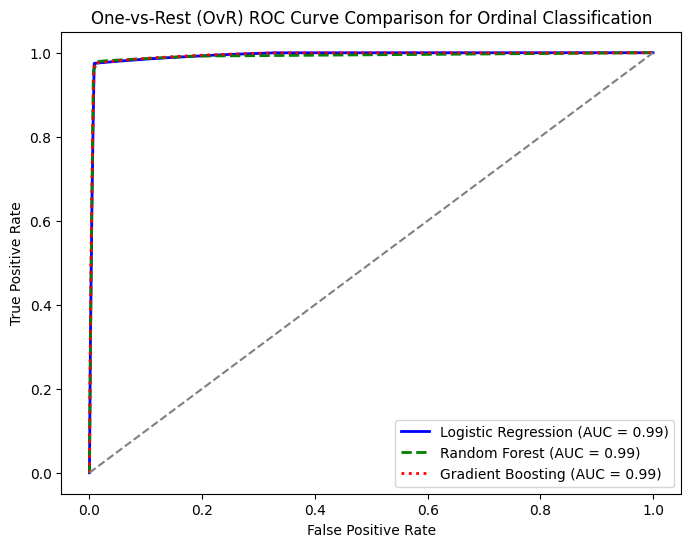

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


# Binarize the true labels for each class
y_test_bin = label_binarize(y_test, classes=sorted(y_test.unique()))

# Get predicted probabilities for each model
logreg_probs = logreg.predict_proba(X_test)
rf_probs = rf_classifier.predict_proba(X_test)
gb_probs = gb_classifier.predict_proba(X_test)
print(logreg_probs.shape)
print(rf_probs.shape)
print(gb_probs.shape)

# Set up the plot
plt.figure(figsize=(8, 6))

# Loop through each class to plot the OvR ROC curve for all models
fpr_logreg, tpr_logreg, _ = roc_curve(y_test_bin.ravel(), logreg_probs.ravel())
fpr_rf, tpr_rf, _ = roc_curve(y_test_bin.ravel(), rf_probs.ravel())
fpr_gb, tpr_gb, _ = roc_curve(y_test_bin.ravel(), gb_probs.ravel())

# Calculate AUC for each classifier
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Plot each model's OvR curve
plt.plot(fpr_logreg, tpr_logreg, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, linestyle='--', label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_gb, tpr_gb, color='red', lw=2, linestyle=':', label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')

# Plot the diagonal line (no skill)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('One-vs-Rest (OvR) ROC Curve Comparison for Ordinal Classification')
plt.legend(loc='lower right')

# Show the plot
plt.show()


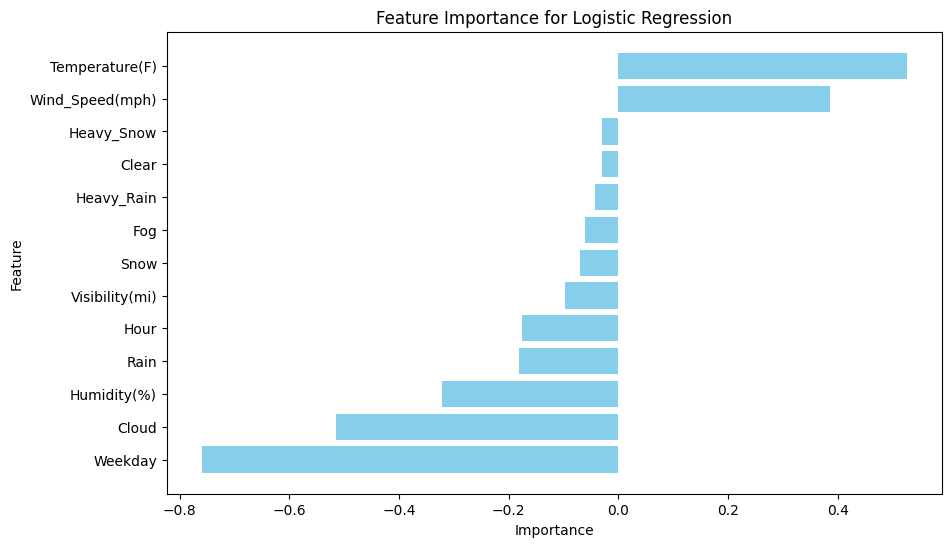

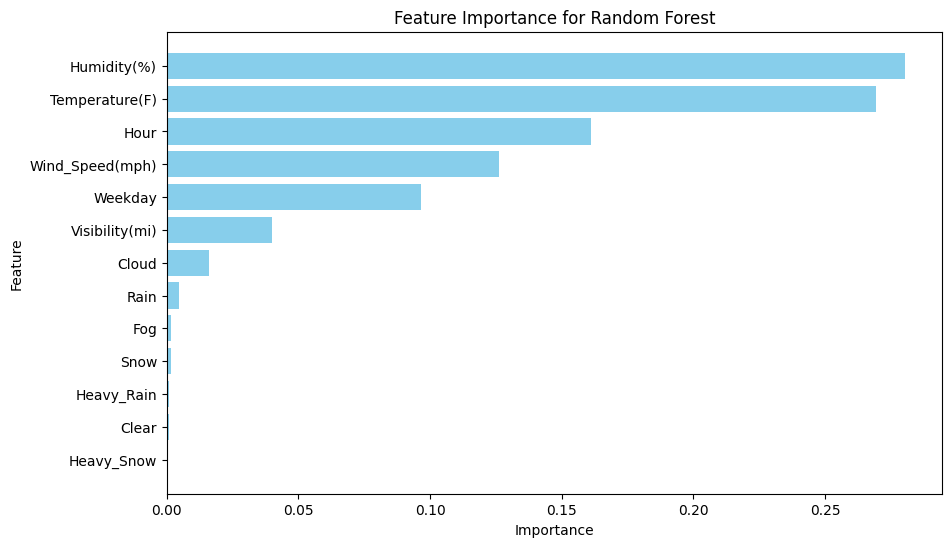

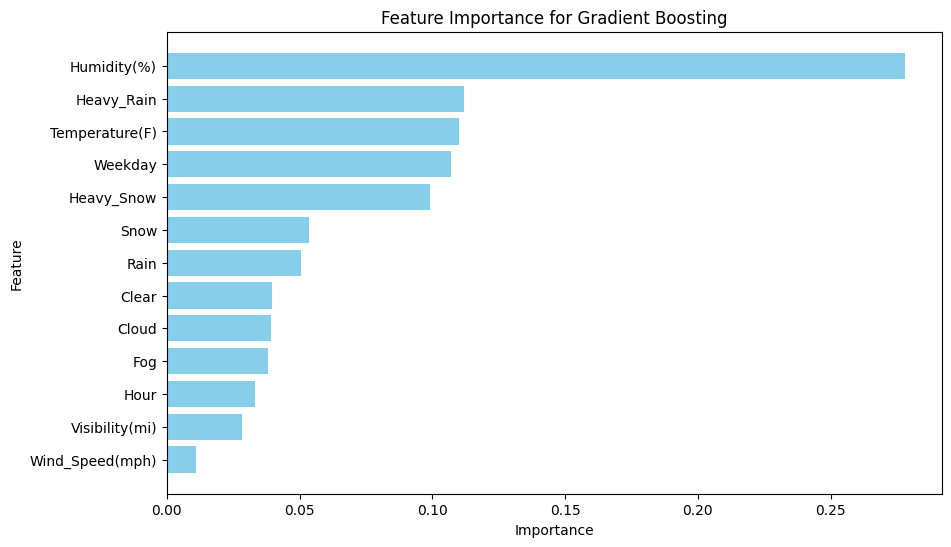

In [ ]:

def plot_feature_importance(model, model_name, X):
    """
    Plots the feature importances or coefficients for a given model.

    Parameters:
    - model: Trained model (e.g., LogisticRegression, RandomForest, GradientBoosting).
    - model_name: Name of the model (String), used for the plot title.
    - X: Feature dataset (usually the training set).
    """
    # If the model has feature_importances_ (like tree-based models)
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
    # If the model is Logistic Regression, use the coefficients
    elif hasattr(model, 'coef_'):
        feature_importances = model.coef_[0]  # For binary classification, use the first element
    else:
        raise ValueError(f"Model {model_name} does not have feature importances or coefficients.")

    # Create a DataFrame for feature importances and sort them
    feature_names = X.columns
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    })

    # Sort the features by importance
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Plot the feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
    plt.title(f'Feature Importance for {model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.gca().invert_yaxis()  # Highest importance on top
    plt.show()

plot_feature_importance(logreg.named_steps['classifier'], 'Logistic Regression', X_train)
plot_feature_importance(rf_classifier.named_steps['classifier'], 'Random Forest', X_train)
plot_feature_importance(gb_classifier.named_steps['classifier'], 'Gradient Boosting', X_train)
# plot_feature_importance(logreg, 'Logistic Regression', X)
# plot_feature_importance(rf_classifier, 'Random Forest', X)
# plot_feature_importance(gb_classifier, 'Gradient Boosting',X)

We can then look at the shap values for our highest accuracy model to get better insight into ways to make it better

In [ ]:
!pip install shap

import shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 10.5 MB/s eta 0:00:00


In [ ]:
features = X.columns
import shap

In [ ]:
X_train_transformed = logreg.named_steps['preprocessor'].transform(X_train)
print(X_train_transformed)
print(type(X_train_transformed))
print(X_train_transformed.dtype)
assert np.all(np.isfinite(X_train_transformed)), "Non-numeric or NaN values found in X_train_transformed"


[[ 1.0352062  -1.92276285 -1.13422746 ...  0.          0.
   0.        ]
 [ 1.43893309 -0.01905731  0.38510164 ...  0.          0.
   0.        ]
 [ 0.83334276  0.2347701   0.38510164 ...  0.          0.
   0.        ]
 ...
 [-1.28622338  0.31937923  0.38510164 ...  0.          0.
   0.        ]
 [ 0.37915002  1.41929799 -2.27372428 ...  0.          0.
   0.        ]
 [ 0.2782183  -0.14597101  0.38510164 ...  0.          0.
   0.        ]]
<class 'numpy.ndarray'>
float64


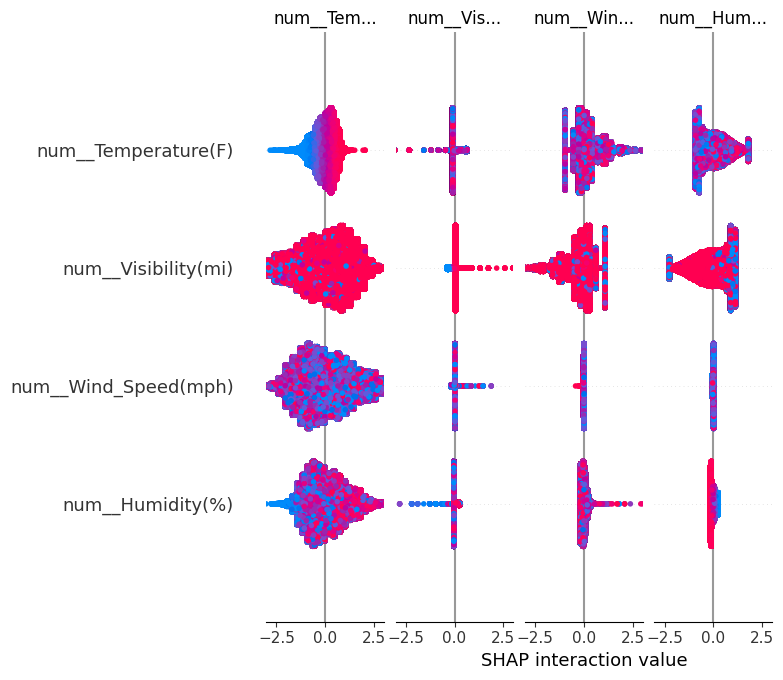

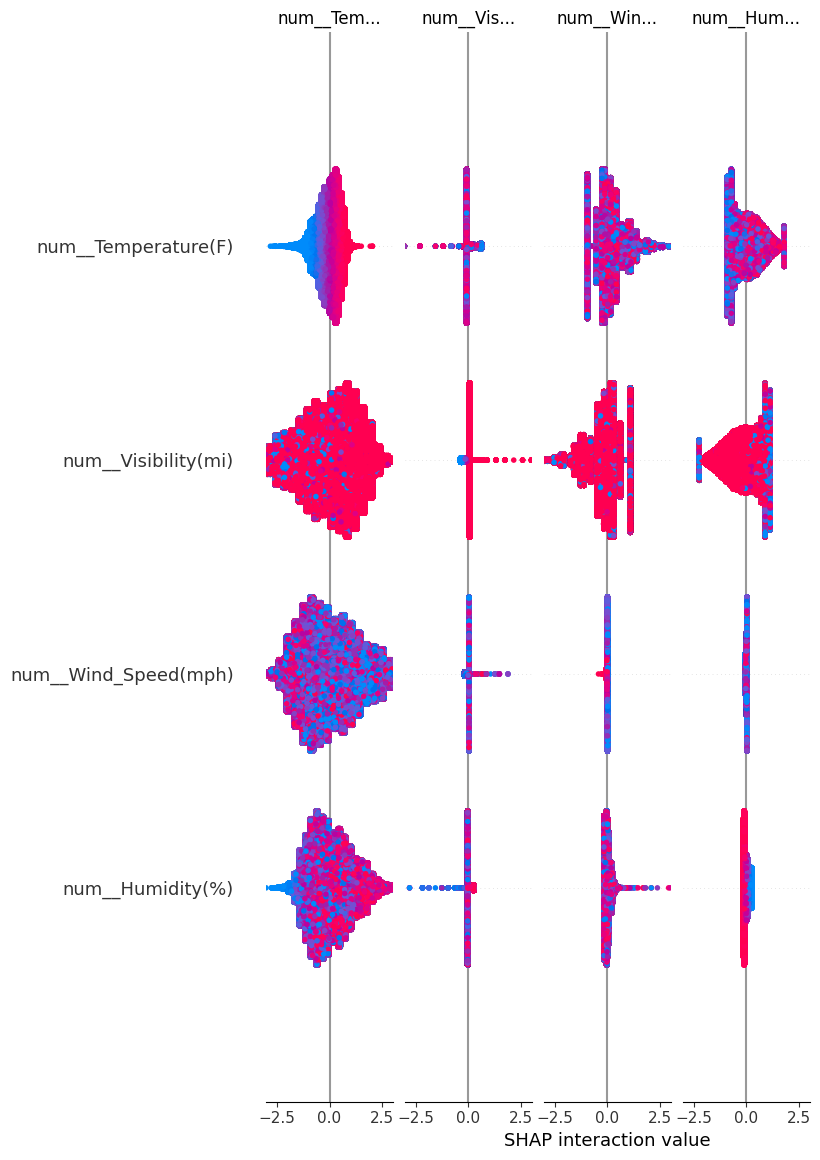

In [ ]:
if hasattr(preprocessor, 'get_feature_names_out'):  # Works for ColumnTransformer
    feature_names = preprocessor.get_feature_names_out()
else:
    feature_names = X_train.columns
# Ensure the pipeline transforms the data for SHAP calculations
X_train_transformed = logreg.named_steps['preprocessor'].transform(X_train)

# SHAP Explainer for Logistic Regression
explainer_logreg = shap.Explainer(logreg.named_steps['classifier'], X_train_transformed)
shap_values_logreg = explainer_logreg(X_train_transformed)

# Feature names after transformation
if hasattr(preprocessor, 'get_feature_names_out'):  # Works for ColumnTransformer
    feature_names = preprocessor.get_feature_names_out()
else:
    feature_names = X_train.columns

# Visualize SHAP values for Logistic Regression
shap.summary_plot(shap_values_logreg, X_train_transformed, feature_names=feature_names, plot_type="bar")

shap.summary_plot(shap_values_logreg, X_train_transformed, feature_names=feature_names, max_display=30, plot_type="dot")


TypeError: only integer scalar arrays can be converted to a scalar index

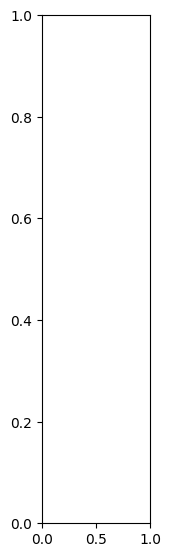

In [ ]:

# Ensure the pipeline transforms the data for SHAP calculations
X_train_transformed = logreg.named_steps['preprocessor'].transform(X_train)

# SHAP Explainer for Logistic Regression
explainer_logreg = shap.Explainer(logreg.named_steps['classifier'], X_train_transformed)
shap_values_logreg = explainer_logreg(X_train_transformed)

# Feature names after transformation
# Visualize SHAP values for Logistic Regression
shap.summary_plot(shap_values_logreg, X_train_transformed, plot_type="bar")

shap.summary_plot(shap_values_logreg, X_train_transformed,max_display=30, plot_type="dot")


###### Unused Shaps

In [ ]:
## This code crashes the runtime

def run_rf_shap():
  # Ensure the pipeline transforms the data for SHAP calculations
  X_train_transformed = rf_classifier.named_steps['preprocessor'].transform(X_train)

  # SHAP Explainer for Logistic Regression
  explainer_rf = shap.TreeExplainer(rf_classifier.named_steps['classifier'], X_train_transformed)
  shap_values_rf = explainer_rf(X_train_transformed)

  # Feature names after transformation
  if hasattr(preprocessor, 'get_feature_names_out'):  # Works for ColumnTransformer
      feature_names = preprocessor.get_feature_names_out()
  else:
      feature_names = X_train.columns

  # Visualize SHAP values for Logistic Regression
  shap.summary_plot(shap_values_rf, X_train_transformed, feature_names=feature_names, plot_type="bar")
  shap.summary_plot(shap_values_rf, X_train_transformed, feature_names=feature_names,plot_type="dot")


Currently SHAP Does not support GradientBoostingClassifier

In [ ]:

# Ensure the pipeline transforms the data for SHAP calculations
X_train_transformed = gb_classifier.named_steps['preprocessor'].transform(X_train)

# SHAP Explainer for Logistic Regression
explainer_gb = shap.Explainer(rf_classifier.named_steps['classifier'], X_train_transformed)
shap_values_gb = explainer_logreg(X_train_transformed)

# Feature names after transformation
if hasattr(preprocessor, 'get_feature_names_out'):  # Works for ColumnTransformer
    feature_names = preprocessor.get_feature_names_out()
else:
    feature_names = X_train.columns

# Visualize SHAP values for Logistic Regression
shap.summary_plot(shap_values_rf, X_train_transformed, feature_names=feature_names, plot_type="bar")
shap.summary_plot(shap_values_rf, X_train_transformed, feature_names=feature_names,plot_type="dot")

# Calculate SHAP values for Gradient Boosting
explainer_gb = shap.TreeExplainer(gb_classifier.named_steps['classifier'], X_train)
shap_values_gb = explainer_gb(X_test)

# Visualize SHAP values for Gradient Boosting
shap.summary_plot(shap_values_gb, X_test, plot_type="bar", feature_names=features)
shap.summary_plot(shap_values_gb, X_test, feature_names=features)

#### Partial dependency plot

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

def plot_partial_dependence(pipeline, model_name, X, original_features, selected_features, target):
    """
    Plots Partial Dependence for a model within a pipeline.

    Parameters:
    - pipeline: The pipeline containing the model.
    - model_name: Name of the model for the plot title.
    - X: Original feature dataset (untransformed).
    - original_features: List of original feature names.
    - selected_features: Indices or list of selected features for partial dependence plotting.
    - target: The target class or variable for the plot.
    """
    # Extract the model from the pipeline
    model = pipeline.named_steps['classifier']
    preprocessor = pipeline.named_steps['preprocessor']

    # Get transformed feature names
    if hasattr(preprocessor, 'get_feature_names_out'):
        transformed_feature_names = preprocessor.get_feature_names_out(original_features)
    else:
        transformed_feature_names = original_features  # If no transformation occurred

    # Map selected feature indices to their names
    selected_feature_names = [transformed_feature_names[i] for i in selected_features]

    # Generate the plots
    fig, ax = plt.subplots(figsize=(12, 6))  # Larger figure for more spacing
    PartialDependenceDisplay.from_estimator(
        model,
        preprocessor.transform(X),  # Use transformed data
        features=selected_features,
        feature_names=selected_feature_names,
        kind="average",
        grid_resolution=50,
        target=target,
        random_state=42,
        ax=ax
    )
    plt.suptitle(f"Partial Dependence Plots for {model_name}", y=1.05)  # Adjust title spacing
    plt.tight_layout(pad=3.0)  # Add spacing between plots
    plt.show()

# List of original feature names
original_features = X_train.columns

# Selected feature indices
selected_features = [0, 1, 2, 3, 4]  # Adjust to the indices of the features you want

# Generate Partial Dependence Plots
plot_partial_dependence(
    logreg, "Logistic Regression", X_train, original_features, selected_features, 1
)
'''plot_partial_dependence(
    rf_classifier, "Random Forest", X_train, original_features, selected_features, 1
)'''
'''plot_partial_dependence(
    gb_classifier, "Gradient Boosting", X_train, original_features, selected_features, 1
)'''


### Using our selected features
Knowing what we know from our analysis can we improve our models using the top features only

In [ ]:
features = ['Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Hour', 'Weekday', 'Clear', 'Cloud', 'Rain', 'Heavy_Rain', 'Snow', 'Heavy_Snow', 'Fog']
target = 'Severity'


# Encode categorical features for use in models
label_encoders = {}
for col in features:
  if df[col].dtype == 'object' or pd.api.types.is_categorical_dtype(df[col]):
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df['Clear'] = df['Clear'].astype(int)
df['Rain'] = df['Rain'].astype(int)
df['Snow'] = df['Snow'].astype(int)
df['Cloud'] = df['Cloud'].astype(int)
df['Heavy_Rain'] = df['Heavy_Rain'].astype(int)
df['Heavy_Snow'] = df['Heavy_Snow'].astype(int)
df['Fog'] = df['Fog'].astype(int)
# Split the data

features = ['Temperature(F)', 'Wind_Speed(mph)']
print(df.columns)
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


columns_to_scale = ['Temperature(F)', 'Wind_Speed(mph)']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columns_to_scale)  # Apply scaling only to specified columns
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

# Logistic Regression Pipeline
logreg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs'))
])
# 1. Logistic Regression
# logreg = LogisticRegression(solver='saga', multi_class='multinomial', max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg}")
features = ['Temperature(F)', 'Wind_Speed(mph)', 'Weekday', 'Humidity(%)','Hour']
columns_to_scale = ['Temperature(F)', 'Humidity(%)', 'Wind_Speed(mph)']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columns_to_scale)  # Apply scaling only to specified columns
    ],
    remainder='passthrough'  # Keep other columns unchanged
)
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Random Forest Pipeline
rf_classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])
# 2. Random Forest Classifier
# rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")
# gb_classifier = GradientBoostingClassifier(random_state=42)
features = ['Temperature(F)', 'Heavy_Snow', 'Weekday', 'Humidity(%)','Heavy_Rain']
columns_to_scale = ['Temperature(F)', 'Humidity(%)']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columns_to_scale)  # Apply scaling only to specified columns
    ],
    remainder='passthrough'  # Keep other columns unchanged
)
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Gradient Boosting Pipeline
gb_classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(n_estimators=100, random_state=42))
])
gb_classifier.fit(X_train, y_train)
y_pred_gb = gb_classifier.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Classifier Accuracy: {accuracy_gb}")


Summary

Our goal is to help predict the severity of an accident based on various conditions. Our original Data File came with various columns associated with the time of the accidents on I-95 and US-1 (such as windspeed and precipitation). However, the data was not usable just yet. So, that leads to Part 1: Cleaning the Data.

Part 1 Summary

Part 1 was all about making the data useable, so this part involved the cleaning, transforming and converting of the various columns to the appropriate datatype (such as putting the Start and End time of an accident to a Date-Time format). After cleaning, we did a preliminary analysis of the data.

Part 2 Summary

Before creating our model, we did a preliminary analysis of our data. This involved comparing accident severity and the amount of accidents to various condiditons in the form of various charts. For example, one of our most extensive charts involved comparing accident severity to all of the columns. Here are some general extrapolations from our analysis:


*   The most amount of accidents happened on I-95 by a wide margin
*   Accidents more frequently occured in the day in rainy and   cloudy conditions
*   Accidents occured the most in Miami compared to other cities
*   Accidents occured mostly in the morning hours (7-9) or afternoon hours.(15-18)





Part 3 Summary

After doing a preliminary analysis, we attempted three models: a logistic regression model, a random forest classifier and finally a gradient boosted classifier. We accounted for Multi-colinearity, Heteroskedasticity, and Endogenity and dealt with those issues accordingly. Following, we analyzed our highest rated model using feature importance, Partial Dependance Plots, and Shap values. Finally, we used feature selection to accuratly tune our model to increase the accuracy of the models.